<a href="https://colab.research.google.com/github/Nandha01/EDA_python/blob/main/automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import pandas as pd    #digunakan untuk analisis data berbentuk tabel
import numpy as np     #digunakan untuk analisis data numerik
import matplotlib.pyplot as plt  #digunakan untuk membuat grafik/gambar dasar
import seaborn as sns  #digunakan untuk membuat grafik yang lebih variatif
import time            #digunakan untuk menjalankan fungsi waktu
import matplotlib.ticker as ticker #digunakan untuk membuat grafik

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
am = pd.read_csv(r'/content/drive/My Drive/Automobile_data.csv')

Mounted at /content/drive


In [ ]:
am.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
am.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
am.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
print(am.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [ ]:
# mencari value '?' di normalized losses
am['normalized-losses'].loc[am['normalized-losses'] == '?'].count()

41

In [ ]:
# mengganti value '?' dengan nilai mean normalized losses serta mengganti data tipenya
nl = am['normalized-losses'].loc[am['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
am['normalized-losses'] = am['normalized-losses'].replace('?',nlmean).astype(int)
am['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int64

In [ ]:
#mencari data non numeric di kolom price
am['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [ ]:
# menampilkan data non numeric di kolom price
am['price'].loc[am['price'].str.isnumeric() == False]

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [ ]:
price = am['price'].loc[am['price'] != '?']
pmean = price.astype(str).astype(int).mean()
am['price'] = am['price'].replace('?',pmean).astype(int)
am['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int64

In [ ]:
am['horsepower'].str.isnumeric().value_counts()
horsepower = am['horsepower'].loc[am['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
am['horsepower'] = am['horsepower'].replace('?',hpmean).astype(int)

In [ ]:
bore = am['bore'].loc[am['bore'] != '?']
boremean = bore.astype(str).astype(float).mean()
am['bore'] = am['bore'].replace('?',boremean).astype(float)
am['bore'].head()

0    3.47
1    3.47
2    2.68
3    3.19
4    3.19
Name: bore, dtype: float64

In [ ]:
stroke = am['stroke'].loc[am['stroke'] != '?']
smean = stroke.astype(str).astype(float).mean()
am['stroke'] = am['stroke'].replace('?',smean).astype(float)
am['stroke'].head()

0    2.68
1    2.68
2    3.47
3    3.40
4    3.40
Name: stroke, dtype: float64

In [ ]:
am['peak-rpm'] = pd.to_numeric(am['peak-rpm'],errors='coerce')
am.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
am['num-of-doors'].loc[am['num-of-doors'] == '?']
am = am[am['num-of-doors'] != '?']
am['num-of-doors'].loc[am['num-of-doors'] == '?']

Series([], Name: num-of-doors, dtype: object)

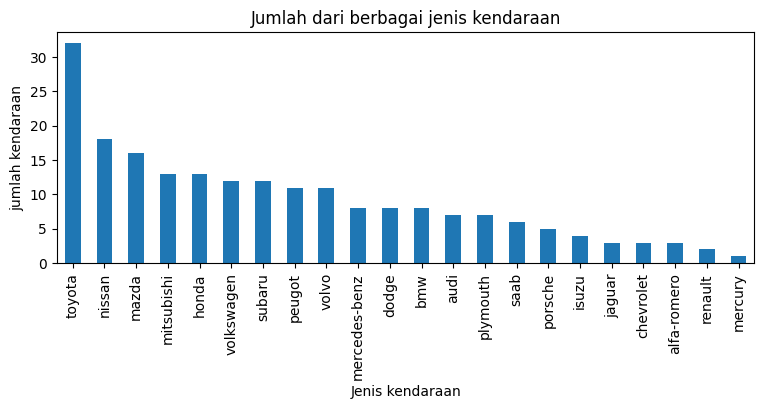

In [ ]:
am.make.value_counts().plot(kind='bar', figsize=(9,3))
plt.title("Jumlah dari berbagai jenis kendaraan")
plt.ylabel('jumlah kendaraan')
plt.xlabel('Jenis kendaraan');

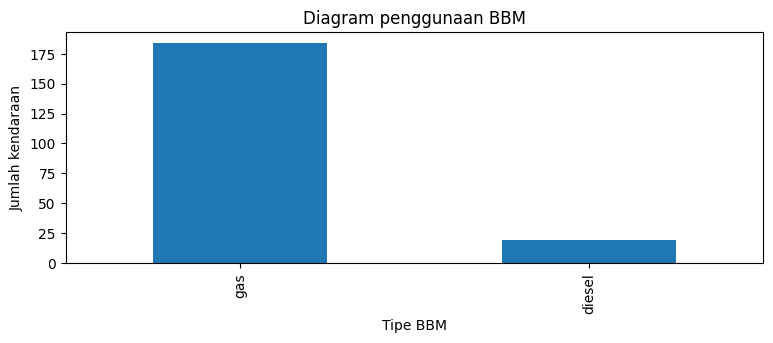

In [ ]:
am['fuel-type'].value_counts().plot(kind='bar',figsize=(9,3))
plt.title("Diagram penggunaan BBM")
plt.ylabel('Jumlah kendaraan')
plt.xlabel('Tipe BBM');

In [ ]:
top_5_hp = am.groupby('make')['horsepower'].mean().nlargest(5)
top_5_hp_df = top_5_hp.to_frame().reset_index()
top_5_hp_df

,make,horsepower
0,porsche,210.400000
1,jaguar,204.666667
2,mercury,175.000000
3,mercedes-benz,146.250000
4,bmw,138.875000


In [ ]:
sedan_gas = am.loc[(am['fuel-type']=='gas')& (am['body-style']=='sedan')]
sedan_gas_count = sedan_gas['make'].value_counts()
sedan_gas_count_df = sedan_gas_count.to_frame().reset_index()
sedan_gas_count_df = sedan_gas_count_df.rename(columns={'index':'Merek Mobil','make':'Jumlah Mobil'})
sedan_gas_count_df

,Merek Mobil,Jumlah Mobil
0,toyota,8
1,nissan,8
2,bmw,8
3,volvo,7
4,mazda,5
5,volkswagen,5
6,subaru,5
7,audi,5
8,honda,5
9,peugot,4


In [ ]:
am.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [ ]:
am

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300.0,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500.0,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800.0,26,27,22470


In [ ]:
am.to_csv("Automobile_data.csv", index=False)

In [ ]:
from google.colab import files
am.to_csv('Automobile_data.csv')
files.download('Automobile_data_updated.csv')

FileNotFoundError: ignored